# Data Cleaning
The data include:
  
- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)

In [1]:
!git clone https://github.com/JulianKrese/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 97 (delta 18), reused 21 (delta 13), pack-reused 69
Receiving objects: 100% (97/97), 2.66 MiB | 6.70 MiB/s, done.
Resolving deltas: 100% (48/48), done.


column =  Unnamed: 0
type =  int64
[1267 1209 2050 ... 1459  733  691]
----------------------
----------------------
column =  sex
type =  int64
[1 0]
----------------------
----------------------
column =  age
type =  int64
[58 40 52 38 43 56 54 47 61 59 64 45 51 63 57 48 46 60 39 53 49 50 44 68
 41 65 55 34 35 37 66 42 62 67 36 33 32 70 69]
----------------------
----------------------
column =  education
type =  float64
[ 1.  2.  4.  3. nan]
----------------------
----------------------
column =  currentSmoker
type =  int64
[0 1]
----------------------
----------------------
column =  cigsPerDay
type =  float64
[ 0. 15. 43. 20.  9.  3. 10. 40.  5. nan 25. 18.  6.  2. 30.  1.  8.  7.
 12. 23. 35. 29. 11. 16. 14. 60. 70. 19.  4. 45. 50. 17. 38. 13.]
----------------------
----------------------
column =  BPMeds
type =  float64
[ 0.  1. nan]
----------------------
----------------------
column =  prevalentStroke
type =  int64
[0 1]
----------------------
----------------------
column =

<ipython-input-6-8a50507b27f4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[to_be_int_columns] = new_df[to_be_int_columns].astype(int)
<ipython-input-6-8a50507b27f4>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns="education", inplace=True)


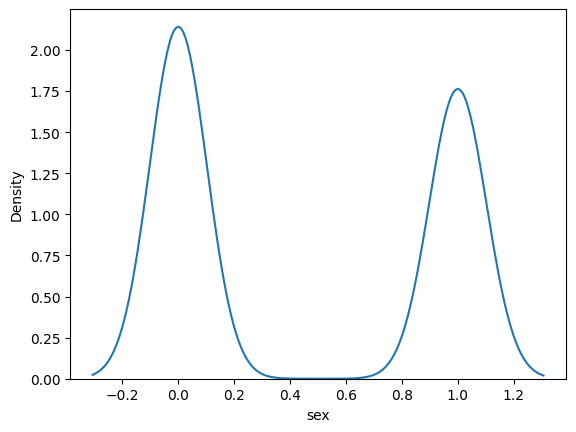

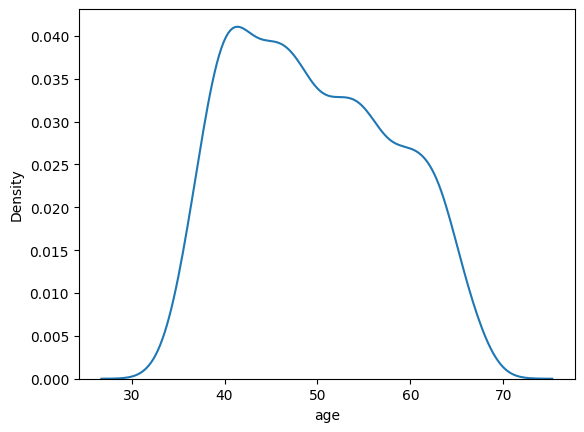

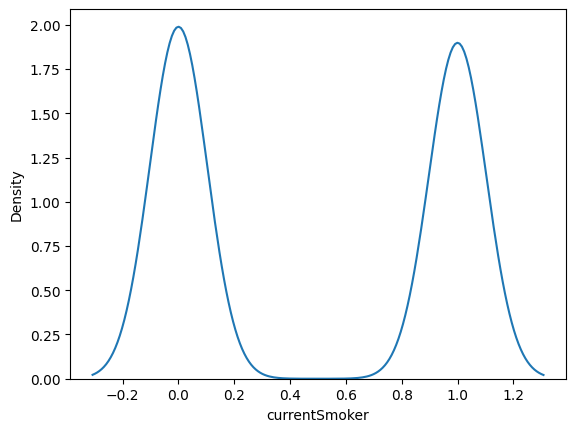

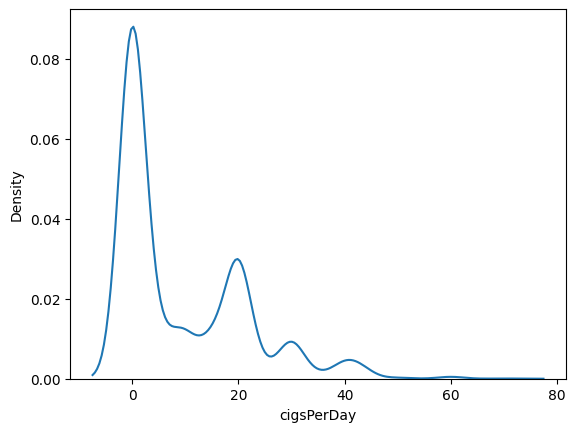

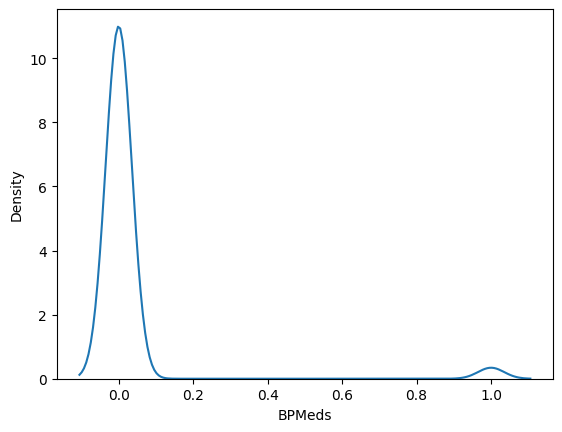

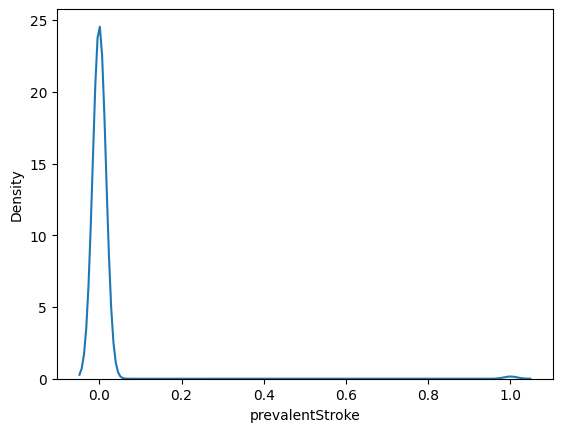

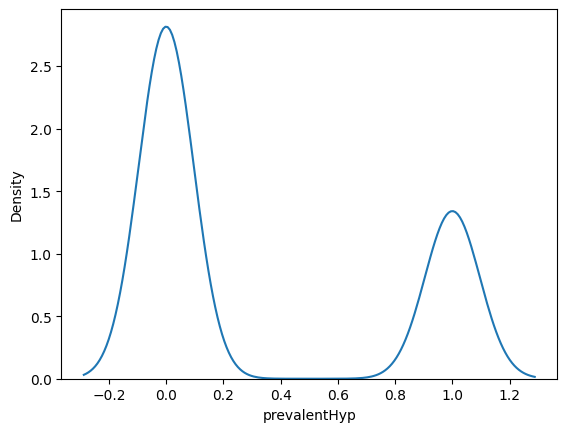

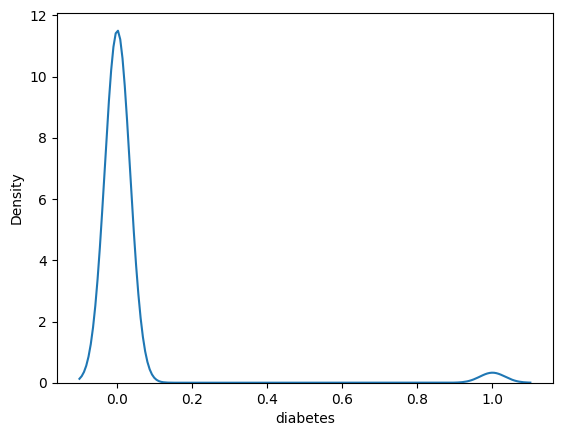

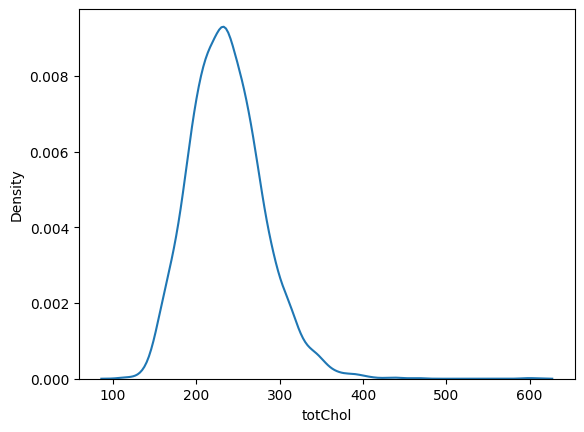

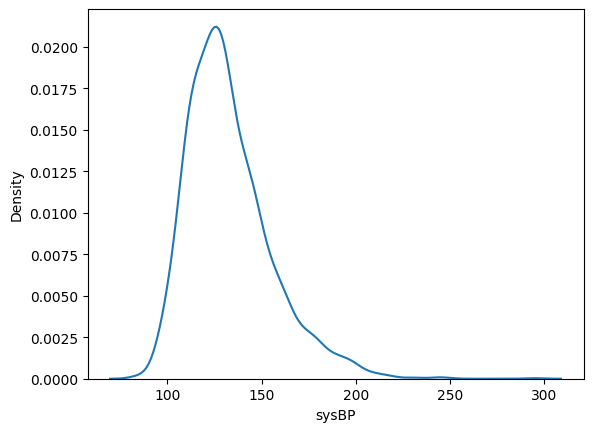

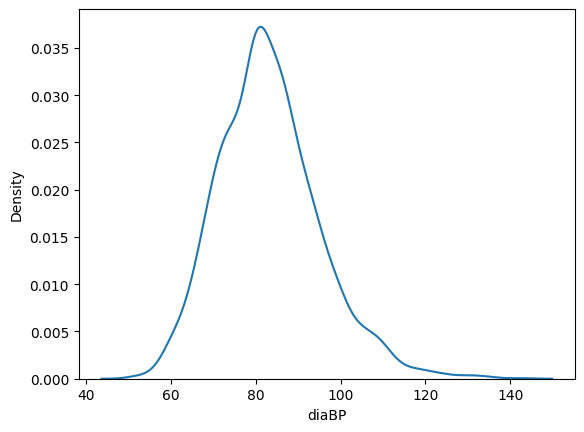

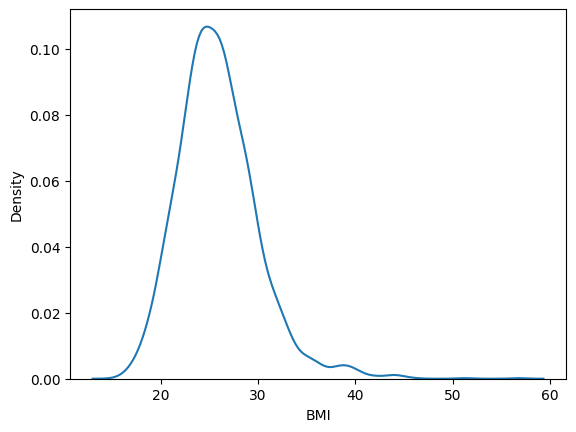

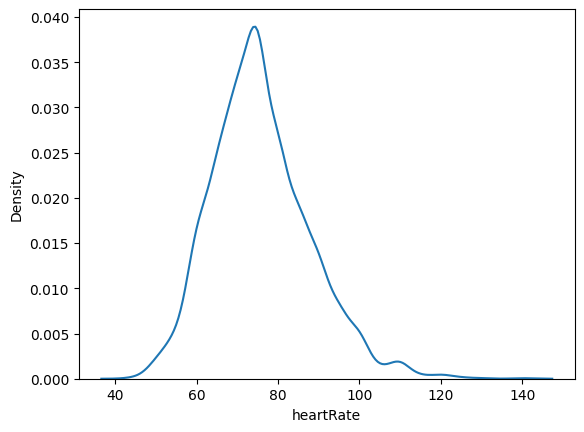

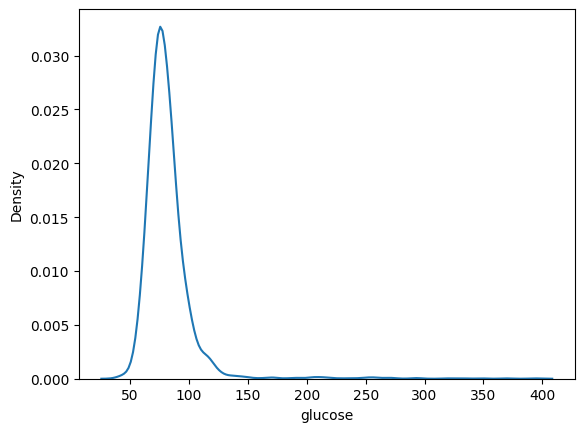

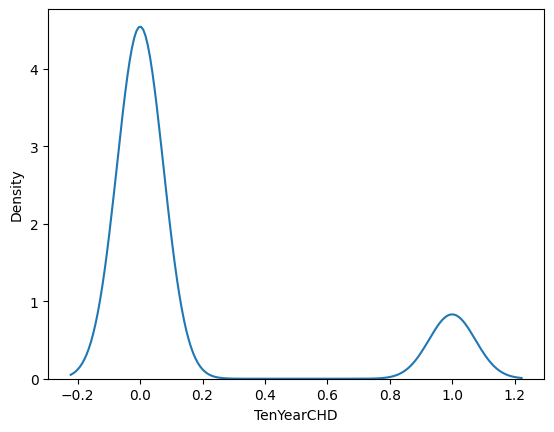

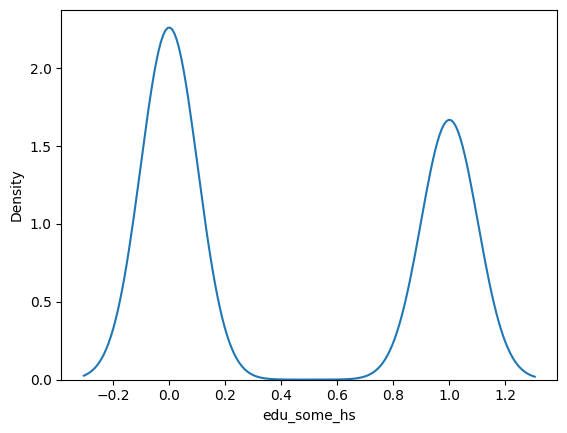

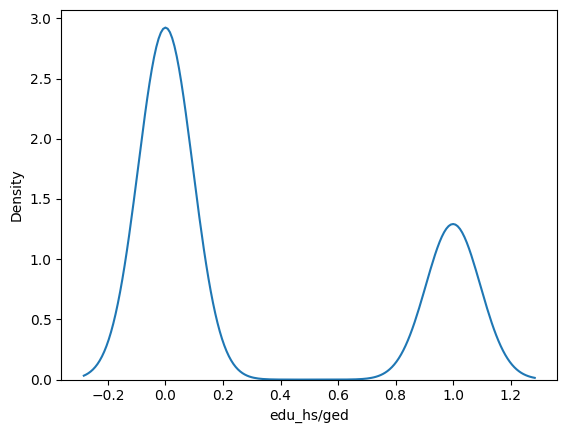

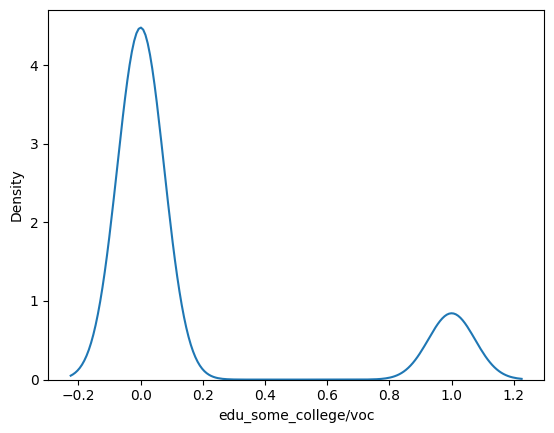

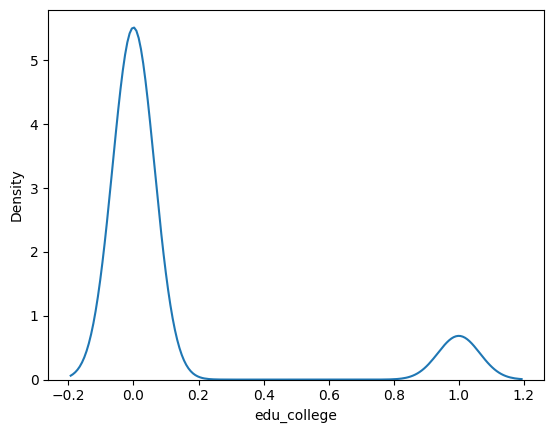

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/project_chd/fhs_train.csv")
df.head()

# getting a look at the df and its values
for column in df.columns:
  print("column = ", column)
  print("type = ", df[column].dtype)
  print(df[column].unique())
  print("----------------------")
  print("----------------------")

# after looking at all the unique values in the columns, I realized I needed to clean...
#   need to drop... Unamed: 0
#   need to one-hot encode... education,
#   need to clear nan's from... education, totalChol, cigsPerDay, glucose, BPMeds
#   need to convert to ints for... cigsPerDay (convert to int), BPMeds (conver to int), totChol (convert to int), glucose (convert to int)

# first drop Unnamed: 0
df = df.drop(columns=["Unnamed: 0"])

# now clear nan's
nan_columns = ["education", "totChol", "cigsPerDay", "glucose", "BPMeds", "BMI"]
new_df = df.dropna(subset=nan_columns)
# print(df.shape)  # 3180 rows
# print(new_df.shape)  # 2744 rows; lost 436 rows

# now convert floats to ints
to_be_int_columns = ["cigsPerDay", "BPMeds", "totChol", "glucose"]
new_df[to_be_int_columns] = new_df[to_be_int_columns].astype(int)

# now one hot encode education
education_df = pd.get_dummies(new_df["education"], dtype=int)
columns_to_rename = {1.0 : "edu_some_hs",
                     2.0 : "edu_hs/ged",
                     3.0 : "edu_some_college/voc",
                     4.0 : "edu_college" }
education_df.rename(columns=columns_to_rename, inplace=True)  # rename because labels are ambiguous + one hot encoding

# drop old education column and concatenate
new_df.drop(columns="education", inplace=True)
new_df = pd.concat([new_df, education_df],axis=1)

# checking to make sure all looks good
print("00000000000000000000000")
for column in new_df.columns:
  print("column = ", column)
  print("type = ", new_df[column].dtype)
  print(new_df[column].unique())
  print("----------------------")
  print("----------------------")
# looks good

# #  need to check outliers and if to min-max or normalize in some way
for var in new_df.columns:
  sns.kdeplot(data=new_df[var])
  plt.show()

# looks like maybe drop some outliers in (and or normalize)...
#   cigsPerDay
#   totChol
#   glucosee
# the rest look fairly good to me

# saving as .csv's to download and use later
x_train_df = new_df.drop(columns=["TenYearCHD"])
y_train_df = new_df["TenYearCHD"]
x_train_df.to_csv("X_train_cleaned.csv", index=False)
y_train_df.to_csv("y_train_cleaned.csv", index=False)



In [8]:
# REPEATING ABOVE BUT ON TEST SET

df = pd.read_csv("/content/project_chd/fhs_test.csv")
df.head()

# getting a look at the df and its values
for column in df.columns:
  print("column = ", column)
  print("type = ", df[column].dtype)
  print(df[column].unique())
  print("----------------------")
  print("----------------------")

# after looking at all the unique values in the columns, I realized I needed to clean...
#   need to drop... Unamed: 0
#   need to one-hot encode... education,
#   need to clear nan's from... education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose
#   need to convert to ints for... cigsPerDay (convert to int), BPMeds (conver to int), totChol (convert to int), glucose (convert to int)

# # first drop Unamed: 0
df = df.drop(columns=["Unnamed: 0"])

# # now clear nan's
nan_columns = ["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]  # CHANGED from cleaning above
new_df = df.dropna(subset=nan_columns)
# print(df.shape)  # 1060 rows
# print(new_df.shape)  # 913 rows; lost 147 rows


# now convert floats to ints
to_be_int_columns = ["cigsPerDay", "BPMeds", "totChol", "glucose", "heartRate"]  # had to add heartRate when didn't in training data?
new_df[to_be_int_columns] = new_df[to_be_int_columns].astype(int)

# # now one-hot encode education
education_df = pd.get_dummies(new_df["education"], dtype=int)
columns_to_rename = {1.0 : "edu_some_hs",
                     2.0 : "edu_hs/ged",
                     3.0 : "edu_some_college/voc",
                     4.0 : "edu_college" }
education_df.rename(columns=columns_to_rename, inplace=True)  # rename because labels are ambiguous + one-hot encoding

# drop old education column and concatenate
new_df.drop(columns="education", inplace=True)
new_df = pd.concat([new_df, education_df],axis=1)

# checking to make sure all looks good
print("00000000000000000000000")
for column in new_df.columns:
  print("column = ", column)
  print("type = ", new_df[column].dtype)
  print(new_df[column].unique())
  print("----------------------")
  print("----------------------")
# looks good


# saving as .csv's to download and use later
X_test_df = new_df.drop(columns=["TenYearCHD"])
y_test_df = new_df["TenYearCHD"]
X_test_df.to_csv("X_test_cleaned.csv", index=False)
y_test_df.to_csv("y_test_cleaned.csv", index=False)


column =  Unnamed: 0
type =  int64
[ 674 4070 3150 ... 3730 2480  115]
----------------------
----------------------
column =  sex
type =  int64
[0 1]
----------------------
----------------------
column =  age
type =  int64
[58 51 44 40 53 41 50 42 45 52 57 46 38 47 48 56 66 68 59 54 49 39 61 62
 67 43 64 37 34 35 55 36 63 65 60 69]
----------------------
----------------------
column =  education
type =  float64
[ 1.  3.  2.  4. nan]
----------------------
----------------------
column =  currentSmoker
type =  int64
[1 0]
----------------------
----------------------
column =  cigsPerDay
type =  float64
[20.  0.  9.  5. 35. 30. 10. 40.  1. 15.  3. 45. 25. 43. 17. 23. 13. 18.
 50.  4.  2.  6. nan 60.  8. 12.  7. 14.]
----------------------
----------------------
column =  BPMeds
type =  float64
[ 0. nan  1.]
----------------------
----------------------
column =  prevalentStroke
type =  int64
[0 1]
----------------------
----------------------
column =  prevalentHyp
type =  int64
[0 1

<ipython-input-8-3f50033fbf8c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[to_be_int_columns] = new_df[to_be_int_columns].astype(int)
<ipython-input-8-3f50033fbf8c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns="education", inplace=True)
